# Sympyを使って微分係数を求める

In [1]:
from sympy import *

In [2]:
x = [Symbol('x[0]'), Symbol('x[1]')]

f1 = lambda x:(x[0]+2*x[1]-7)**2 + (2*x[0]+x[1]-5)**2

print([diff(f1(x), x[0]), diff(f1(x), x[1])])

print([[diff(f1(x), x[0], x[0]), diff(f1(x), x[0], x[1])],
       [diff(f1(x), x[1], x[0]), diff(f1(x), x[1], x[1])]])

[10*x[0] + 8*x[1] - 34, 8*x[0] + 10*x[1] - 38]
[[10, 8], [8, 10]]


# P.169 コレスキー分解

In [3]:
import numpy as np
import scipy.linalg as linalg

a = np.random.randint(-10, 10, (3,2))
A = np.dot(a.T, a)
print(A)

# 下三角行列Uに分解
U = linalg.cholesky(A)
print(U)

print(np.dot(U.T,U))

[[35  0]
 [ 0 14]]
[[5.91607978 0.        ]
 [0.         3.74165739]]
[[35.  0.]
 [ 0. 14.]]


# P.174 ニュートン法

In [4]:
x = [Symbol('x[' + str(i) +']') for i in range(3)]
# 関数f
f = lambda x:sum(100*(x[i+1] - x[i]**2)**2 + (x[i]-1)**2 for i in range(2))

In [5]:
print([diff(f(x), x[0]), diff(f(x), x[1]), diff(f(x), x[2])])

[-400*x[0]*(-x[0]**2 + x[1]) + 2*x[0] - 2, -200*x[0]**2 - 400*x[1]*(-x[1]**2 + x[2]) + 202*x[1] - 2, -200*x[1]**2 + 200*x[2]]


In [6]:
print([
    [diff(f(x), x[0], x[0]), diff(f(x), x[0], x[1]), diff(f(x), x[0], x[2])],
    [diff(f(x), x[1], x[0]), diff(f(x), x[1], x[1]), diff(f(x), x[1], x[2])],
    [diff(f(x), x[2], x[0]), diff(f(x), x[2], x[1]), diff(f(x), x[2], x[2])],
])

[[2*(600*x[0]**2 - 200*x[1] + 1), -400*x[0], 0], [-400*x[0], 2*(600*x[1]**2 - 200*x[2] + 101), -400*x[1]], [0, -400*x[1], 200]]


In [7]:
# 勾配ベクトル
nf = lambda x:np.array(
    [-400*x[0]*(-x[0]**2 + x[1]) + 2*x[0] - 2, 
     -200*x[0]**2 - 400*x[1]*(-x[1]**2 + x[2]) + 202*x[1] - 2, 
     -200*x[1]**2 + 200*x[2]]
)

# ヘッセ行列
Hf = lambda x:np.array(
    [
        [2*(600*x[0]**2 - 200*x[1] + 1), -400*x[0], 0],
        [-400*x[0], 2*(600*x[1]**2 - 200*x[2] + 101), -400*x[1]],
        [0, -400*x[1], 200]
    ]  
)

In [8]:
# ニュートン法
x0 = [10,10,10]
MEPS = 1.0e-6

k = 0
xk = np.array(x0)
while linalg.norm(nf(xk)) > MEPS:
    d = -np.dot(linalg.inv(Hf(xk)), nf(xk))
    xk = xk + d
    k = k +1
    print('k=',k,': xk=',xk) #, ', grad=', nf(xk))

k= 1 : xk= [  6.90177364  10.15438635 103.08772695]
k= 2 : xk= [  6.55660837  40.99957925 729.53957352]
k= 3 : xk= [   6.40799855   40.99939058 1680.95002753]
k= 4 : xk= [    3.49278516     3.67433827 -1379.65876772]
k= 5 : xk= [ 2.5882274   3.67512024 13.5065082 ]
k= 6 : xk= [ 2.53951869  6.39285083 33.48248218]
k= 7 : xk= [ 2.52714041  6.38901776 40.81953328]
k= 8 : xk= [  1.42537298   0.81976269 -30.34459119]
k= 9 : xk= [1.09903468 0.82425834 0.6793816 ]
k= 10 : xk= [1.09231206 1.19117386 1.28426817]
k= 11 : xk= [1.08745478 1.18292585 1.39924554]
k= 12 : xk= [1.00275246 0.99837933 0.96270387]
k= 13 : xk= [0.99947738 0.99891841 0.9978377 ]
k= 14 : xk= [0.99999931 0.99999837 0.99999557]
k= 15 : xk= [1. 1. 1.]


In [9]:
# 準ニュートン法:ヘッセ行列が陽に求められないときなど
from scipy.optimize import minimize

f = lambda x:(1.5-x[0]+x[0]*x[1])**2+(2.25-x[0]+x[0]*x[1]**2)+(2.625-x[0]+x[0]*x[1]**3)**2

x0 = [0,0]
res = minimize(f, x0, method='BFGS')
print(res)

      fun: -0.15509077522360842
 hess_inv: array([[1.50372993, 0.36709477],
       [0.36709477, 0.12580684]])
      jac: array([-4.95463610e-07,  1.68383121e-06])
  message: 'Optimization terminated successfully.'
     nfev: 56
      nit: 12
     njev: 14
   status: 0
  success: True
        x: array([3.15033469, 0.43409377])


# P.182 凸2次最適化問題

- minimize c.T * x + 1/2x.T * Q * x
- subject to A * x >= b, x >= 0

In [14]:
from cvxopt import solvers, matrix
import numpy as np

Q = matrix(np.array([[2.0,-1.0], [-1.0,3.0]]))
c = matrix(np.array([-2.0,-4.0]))
A = matrix(np.array([[-1.0, 0.0], [0.0, -1.0], [2.0,3.0], [1.0, 4.0]]))
b = matrix(np.array([0.0, 0.0, 6.0, 5.0]))

sol = solvers.qp(P=Q, q=c, G=A, h=b)
print(sol)
print(sol['x'])
print(sol['primal objective'])

     pcost       dcost       gap    pres   dres
 0: -4.8105e+00 -6.4700e+00  1e+01  4e-01  3e+00
 1: -4.1678e+00 -5.6606e+00  1e+00  3e-17  1e-16
 2: -4.5418e+00 -4.6061e+00  6e-02  1e-16  2e-16
 3: -4.5465e+00 -4.5472e+00  7e-04  1e-16  1e-16
 4: -4.5465e+00 -4.5465e+00  7e-06  1e-16  2e-16
 5: -4.5465e+00 -4.5465e+00  7e-08  6e-17  1e-16
Optimal solution found.
{'relative gap': 1.6022504205937345e-08, 'y': <0x1 matrix, tc='d'>, 'x': <2x1 matrix, tc='d'>, 'z': <4x1 matrix, tc='d'>, 'dual objective': -4.546511694891993, 'iterations': 5, 'gap': 7.284650158656691e-08, 'primal slack': 1.0081752643395157e-08, 'status': 'optimal', 'dual slack': 4.214302890474512e-09, 's': <4x1 matrix, tc='d'>, 'dual infeasibility': 1.0235750533041806e-16, 'primal objective': -4.546511622045491, 'primal infeasibility': 6.030892188481198e-17}
[ 1.19e+00]
[ 9.53e-01]

-4.546511622045491


# P.183 ゴミ集積所決定問題

In [15]:
import numpy as np
import picos as pic
import matplotlib.pyplot as plt
% matplotlib inline

In [20]:
socp = pic.Problem()

H = [0,1,2,3,4,5,6,7]
p = [
    [44,47],
    [64,67],
    [67, 9],
    [83,21],
    [36,87],
    [70,88],
    [88,12],
    [58,65]
]
w = [1,2,2,1,2,5,4,1]

# 設計変数はx[0],x[1]を持つ二次元変数(ゴミ集積所の場所)
X = socp.add_variable('X',2)
# 各地店からゴミ集積所までの距離d_i
d = [socp.add_variable('d[' + str(i) + ']', 1) for i in H]
# 目的関数：重み付き距離の最小化
objective = sum(w[i]*d[i] for i in H)
socp.set_objective('min', objective)
# 制約条件：集積所から各地点まではd_i以下
socp.add_list_of_constraints([abs(p[i] - X) < d[i] for i in H])

res = socp.solve(solver='cvxopt')

--------------------------
  cvxopt CONELP solver
--------------------------
     pcost       dcost       gap    pres   dres   k/t
 0: -3.6415e-14 -1.5148e-14  9e+02  5e-01  8e-17  1e+00
 1:  5.5052e+02  5.5465e+02  2e+02  1e-01  5e-16  4e+00
 2:  6.0315e+02  6.0404e+02  4e+01  2e-02  7e-16  9e-01
 3:  6.1384e+02  6.1426e+02  1e+01  9e-03  5e-16  4e-01
 4:  6.1807e+02  6.1814e+02  1e+00  7e-04  6e-16  7e-02
 5:  6.1856e+02  6.1856e+02  6e-02  4e-05  1e-15  4e-03
 6:  6.1859e+02  6.1859e+02  2e-03  1e-06  4e-14  1e-04
 7:  6.1859e+02  6.1859e+02  9e-05  6e-08  2e-13  6e-06
 8:  6.1859e+02  6.1859e+02  2e-06  2e-09  2e-12  1e-07
Optimal solution found.
cvxopt status: optimal


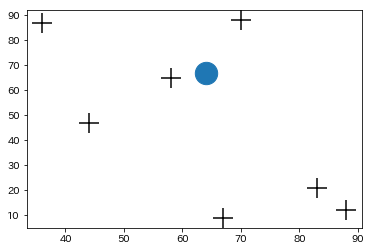

In [26]:
x = np.array(p)[:,0]
y = np.array(p)[:,1]

plt.scatter(x, y, color='k', marker='+',s=400)
plt.scatter(X.value[0], X.value[1],  marker='o', s=500)